<a href="https://colab.research.google.com/github/abiramic08/Final_project/blob/main/stoct_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load the data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/stock_data.csv')

Data Loading and Initial Exploration

In [5]:
df.head()

,Open,Close,High,Low,Volume,RSI,MACD,Bollinger_Upper,Bollinger_Lower,Sentiment_Score,GDP_Growth,Inflation_Rate,Target
0,0.374639,0.374780,0.373510,0.378390,0.298909,0.847286,0.741715,0.367146,0.366420,0.877177,0.580868,0.038604,0
1,0.950982,0.937746,0.938422,0.946158,0.094805,0.494543,0.881343,0.938396,0.935640,0.907192,0.527044,0.108908,0
2,0.732198,0.719825,0.723644,0.723158,0.126348,0.195471,0.463179,0.710666,0.702300,0.378363,0.351052,0.432540,0
3,0.598823,0.599865,0.596973,0.605322,0.180662,0.736684,0.289076,0.593793,0.586936,0.231614,0.493274,0.946349,0
4,0.156053,0.163410,0.155891,0.166084,0.203646,0.418698,0.318761,0.164158,0.156355,0.191642,0.365116,0.074867,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             10000 non-null  float64
 1   Close            10000 non-null  float64
 2   High             10000 non-null  float64
 3   Low              10000 non-null  float64
 4   Volume           10000 non-null  float64
 5   RSI              10000 non-null  float64
 6   MACD             10000 non-null  float64
 7   Bollinger_Upper  10000 non-null  float64
 8   Bollinger_Lower  10000 non-null  float64
 9   Sentiment_Score  10000 non-null  float64
 10  GDP_Growth       10000 non-null  float64
 11  Inflation_Rate   10000 non-null  float64
 12  Target           10000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1015.8 KB


In [7]:
df.isnull().sum()

,0
Open,0
Close,0
High,0
Low,0
Volume,0
RSI,0
MACD,0
Bollinger_Upper,0
Bollinger_Lower,0
Sentiment_Score,0


In [8]:
df.describe()

,Open,Close,High,Low,Volume,RSI,MACD,Bollinger_Upper,Bollinger_Lower,Sentiment_Score,GDP_Growth,Inflation_Rate,Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.494293,0.495067,0.493072,0.497314,0.496869,0.503171,0.501809,0.496134,0.492211,0.495362,0.500334,0.501918,0.05950
std,0.287715,0.281587,0.284019,0.283283,0.289297,0.288361,0.287825,0.276432,0.276758,0.287750,0.288366,0.290510,0.23657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.246390,0.251759,0.247605,0.252727,0.244266,0.256966,0.253762,0.256406,0.253212,0.244864,0.246618,0.249640,0.00000
50%,0.492662,0.492477,0.491295,0.495413,0.493722,0.506117,0.504232,0.493400,0.489197,0.496597,0.503139,0.502395,0.00000
75%,0.740212,0.736107,0.736170,0.739736,0.750494,0.753489,0.752636,0.732336,0.729294,0.742288,0.750093,0.756607,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


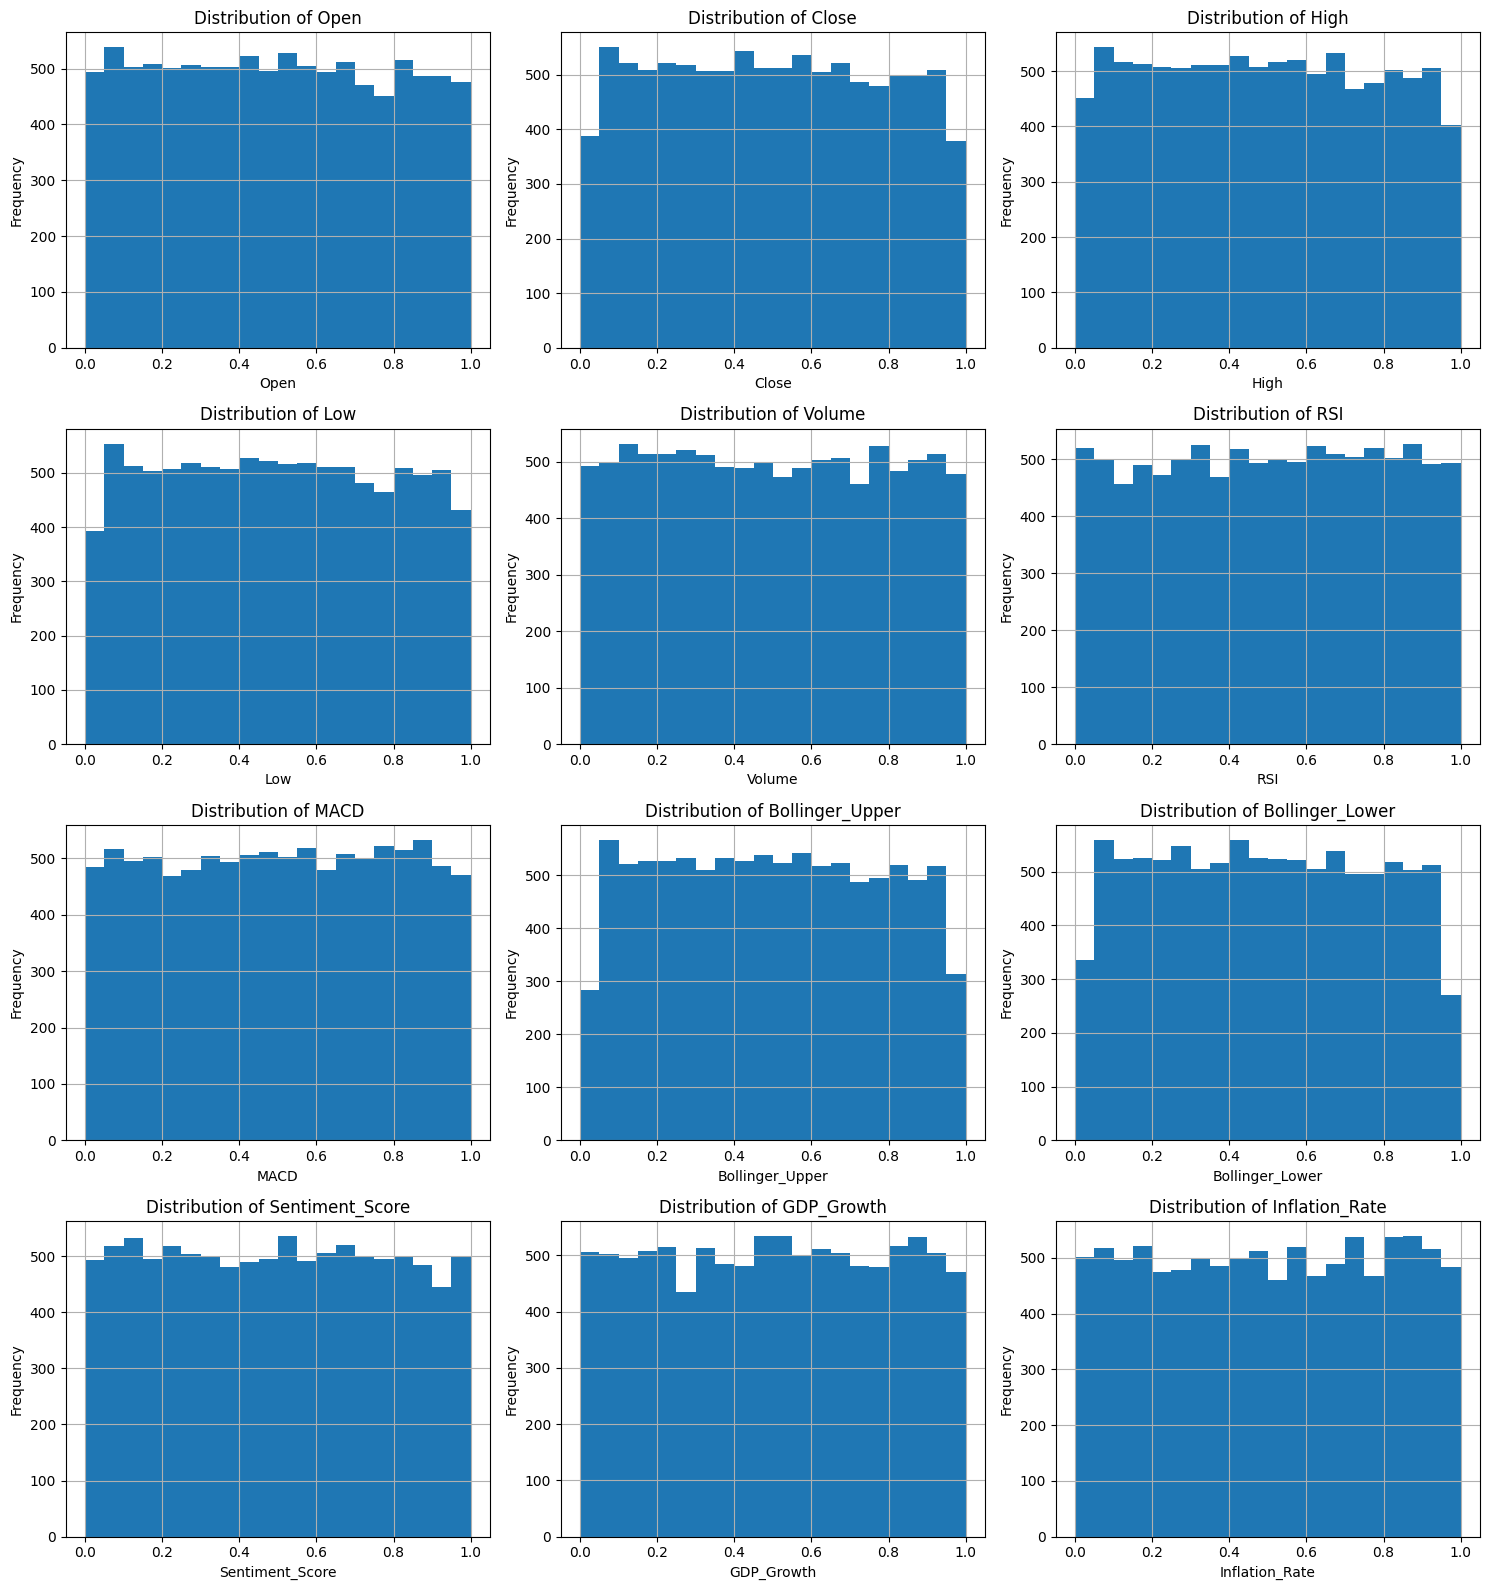

In [9]:
import matplotlib.pyplot as plt

# Identify numerical columns (excluding the 'Target' column if it's categorical)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Target' in numerical_cols:
    numerical_cols.remove('Target')

# Determine the number of rows and columns for the subplot grid
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # Aim for 3 columns per row

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 3, i + 1)
    df[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Data Preprocessing and Feature Engineering

In [10]:
y = df['Target']
X = df.drop('Target', axis=1)

# Create lag features
for col in ['Open', 'Close', 'High', 'Low', 'Volume', 'RSI', 'MACD']:
    for i in range(1, 4):
        X[f'{col}_lag_{i}'] = X[col].shift(i)

X.head()

,Open,Close,High,Low,Volume,RSI,MACD,Bollinger_Upper,Bollinger_Lower,Sentiment_Score,...,Low_lag_3,Volume_lag_1,Volume_lag_2,Volume_lag_3,RSI_lag_1,RSI_lag_2,RSI_lag_3,MACD_lag_1,MACD_lag_2,MACD_lag_3
0,0.374639,0.374780,0.373510,0.378390,0.298909,0.847286,0.741715,0.367146,0.366420,0.877177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.950982,0.937746,0.938422,0.946158,0.094805,0.494543,0.881343,0.938396,0.935640,0.907192,...,NaN,0.298909,NaN,NaN,0.847286,NaN,NaN,0.741715,NaN,NaN
2,0.732198,0.719825,0.723644,0.723158,0.126348,0.195471,0.463179,0.710666,0.702300,0.378363,...,NaN,0.094805,0.298909,NaN,0.494543,0.847286,NaN,0.881343,0.741715,NaN
3,0.598823,0.599865,0.596973,0.605322,0.180662,0.736684,0.289076,0.593793,0.586936,0.231614,...,0.378390,0.126348,0.094805,0.298909,0.195471,0.494543,0.847286,0.463179,0.881343,0.741715
4,0.156053,0.163410,0.155891,0.166084,0.203646,0.418698,0.318761,0.164158,0.156355,0.191642,...,0.946158,0.180662,0.126348,0.094805,0.736684,0.195471,0.494543,0.289076,0.463179,0.881343


In [11]:
X['SMA_7'] = X['Close'].rolling(window=7).mean()
X['SMA_14'] = X['Close'].rolling(window=14).mean()

X.head(15)

,Open,Close,High,Low,Volume,RSI,MACD,Bollinger_Upper,Bollinger_Lower,Sentiment_Score,...,Volume_lag_2,Volume_lag_3,RSI_lag_1,RSI_lag_2,RSI_lag_3,MACD_lag_1,MACD_lag_2,MACD_lag_3,SMA_7,SMA_14
0,0.374639,0.374780,0.373510,0.378390,0.298909,0.847286,0.741715,0.367146,0.366420,0.877177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.950982,0.937746,0.938422,0.946158,0.094805,0.494543,0.881343,0.938396,0.935640,0.907192,...,NaN,NaN,0.847286,NaN,NaN,0.741715,NaN,NaN,NaN,NaN
2,0.732198,0.719825,0.723644,0.723158,0.126348,0.195471,0.463179,0.710666,0.702300,0.378363,...,0.298909,NaN,0.494543,0.847286,NaN,0.881343,0.741715,NaN,NaN,NaN
3,0.598823,0.599865,0.596973,0.605322,0.180662,0.736684,0.289076,0.593793,0.586936,0.231614,...,0.094805,0.298909,0.195471,0.494543,0.847286,0.463179,0.881343,0.741715,NaN,NaN
4,0.156053,0.163410,0.155891,0.166084,0.203646,0.418698,0.318761,0.164158,0.156355,0.191642,...,0.126348,0.094805,0.736684,0.195471,0.494543,0.289076,0.463179,0.881343,NaN,NaN
5,0.156029,0.172907,0.166795,0.165806,0.242256,0.594660,0.697083,0.188215,0.180907,0.881971,...,0.180662,0.126348,0.418698,0.736684,0.195471,0.318761,0.289076,0.463179,NaN,NaN
6,0.058089,0.056673,0.062732,0.056932,0.255455,0.107264,0.567617,0.077499,0.065521,0.231206,...,0.203646,0.180662,0.594660,0.418698,0.736684,0.697083,0.318761,0.289076,0.432172,NaN
7,0.866419,0.862609,0.857992,0.867400,0.455720,0.631619,0.486506,0.862911,0.854022,0.530838,...,0.242256,0.203646,0.107264,0.594660,0.418698,0.567617,0.697083,0.318761,0.501862,NaN
8,0.601280,0.606079,0.603585,0.604285,0.509579,0.373568,0.202622,0.612847,0.607921,0.331728,...,0.255455,0.242256,0.631619,0.107264,0.594660,0.486506,0.567617,0.697083,0.454481,NaN
9,0.708269,0.710685,0.705567,0.712457,0.308876,0.334204,0.875694,0.710610,0.704885,0.498933,...,0.455720,0.255455,0.373568,0.631619,0.107264,0.202622,0.486506,0.567617,0.453175,NaN


In [12]:
data = pd.concat([X, y], axis=1).dropna()
X = data.drop('Target', axis=1)
y = data['Target']

print(X.shape)

(9987, 35)


In [13]:
total_rows = X.shape[0]
train_size = int(total_rows * 0.7)
val_size = int(total_rows * 0.15)
test_size = total_rows - train_size - val_size

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_val, y_val = X.iloc[train_size:train_size + val_size], y.iloc[train_size:train_size + val_size]
X_test, y_test = X.iloc[train_size + val_size:], y.iloc[train_size + val_size:]

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}, y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (6990, 35), y_train shape: (6990,)
X_val shape: (1498, 35), y_val shape: (1498,)
X_test shape: (1499, 35), y_test shape: (1499,)


Statistical Baseline Model Implementation

In [14]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by replacing zero true values with a small epsilon
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100

print("Required libraries imported and MAPE function defined.")

Required libraries imported and MAPE function defined.


In [15]:
model = ARIMA(y_train, order=(5,1,0))
model_fit = model.fit()

print("ARIMA model fitted successfully.")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA model fitted successfully.


In [16]:
model = ARIMA(y_train.reset_index(drop=True), order=(5,1,0))
model_fit = model.fit()

# Make predictions for the test set
predictions = model_fit.forecast(steps=len(y_test))

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print("ARIMA model fitted successfully.")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

ARIMA model fitted successfully.
RMSE: 0.2648
MAE: 0.2233
MAPE: 80324376052355136.0000%


LSTM Model Training and Hyperparameter Optimization

In [18]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.9 MB/s eta 0:00:00


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

print("Libraries imported successfully.")

Libraries imported successfully.


In [20]:
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

print(f'X_train_reshaped shape: {X_train_reshaped.shape}')
print(f'X_val_reshaped shape: {X_val_reshaped.shape}')
print(f'X_test_reshaped shape: {X_test_reshaped.shape}')

X_train_reshaped shape: (6990, 1, 35)
X_val_reshaped shape: (1498, 1, 35)
X_test_reshaped shape: (1499, 1, 35)


In [21]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]),
        return_sequences=False # Since we have only one timestep per sample
    ))
    if hp.Boolean('dropout'):
        model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )
    return model

print("build_model function defined.")

build_model function defined.


In [22]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='lstm_tuning'
)

print("Keras Tuner Hyperband object initialized.")

Keras Tuner Hyperband object initialized.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
def build_model(hp):
    model = keras.Sequential()
    # Add an Input layer explicitly as the first layer
    model.add(keras.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(layers.LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        return_sequences=False # Since we have only one timestep per sample
    ))
    if hp.Boolean('dropout'):
        model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )
    return model

print("build_model function updated to use explicit Input layer.")

build_model function updated to use explicit Input layer.


In [24]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='lstm_tuning'
)

print("Keras Tuner Hyperband object re-initialized with updated build_model.")

Keras Tuner Hyperband object re-initialized with updated build_model.


In [25]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tuner.search(
    X_train_reshaped, y_train,
    epochs=10,
    validation_data=(X_val_reshaped, y_val),
    callbacks=[early_stopping]
)

print("Hyperparameter search completed.")

Trial 30 Complete [00h 00m 11s]
val_loss: 0.04750943183898926

Best val_loss So Far: 0.045765768736600876
Total elapsed time: 00h 03m 37s
Hyperparameter search completed.


Model Benchmarking and Evaluation

In [26]:
best_model = tuner.get_best_models(num_models=1)[0]
lstm_predictions = best_model.predict(X_test_reshaped)

print("Best LSTM model retrieved and predictions made.")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Best LSTM model retrieved and predictions made.


In [27]:
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions))
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
mape_lstm = mean_absolute_percentage_error(y_test, lstm_predictions)

print(f"LSTM RMSE: {rmse_lstm:.4f}")
print(f"LSTM MAE: {mae_lstm:.4f}")
print(f"LSTM MAPE: {mape_lstm:.4f}%")

LSTM RMSE: 0.2127
LSTM MAE: 0.0980
LSTM MAPE: 27291963898386440.0000%


In [28]:
print("\n--- Model Performance Comparison ---")
print(f"ARIMA RMSE: {rmse:.4f}")
print(f"ARIMA MAE: {mae:.4f}")
print(f"ARIMA MAPE: {mape:.4f}%")
print("\n")
print(f"LSTM RMSE: {rmse_lstm:.4f}")
print(f"LSTM MAE: {mae_lstm:.4f}")
print(f"LSTM MAPE: {mape_lstm:.4f}%")


--- Model Performance Comparison ---
ARIMA RMSE: 0.2648
ARIMA MAE: 0.2233
ARIMA MAPE: 80324376052355136.0000%


LSTM RMSE: 0.2127
LSTM MAE: 0.0980
LSTM MAPE: 27291963898386440.0000%


Model Explainability Analysis

In [29]:
try:
    import shap
    print("SHAP library is already installed.")
except ImportError:
    print("Installing SHAP library...")
    !pip install shap
    import shap
    print("SHAP library installed successfully.")

SHAP library is already installed.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
3310/3310 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

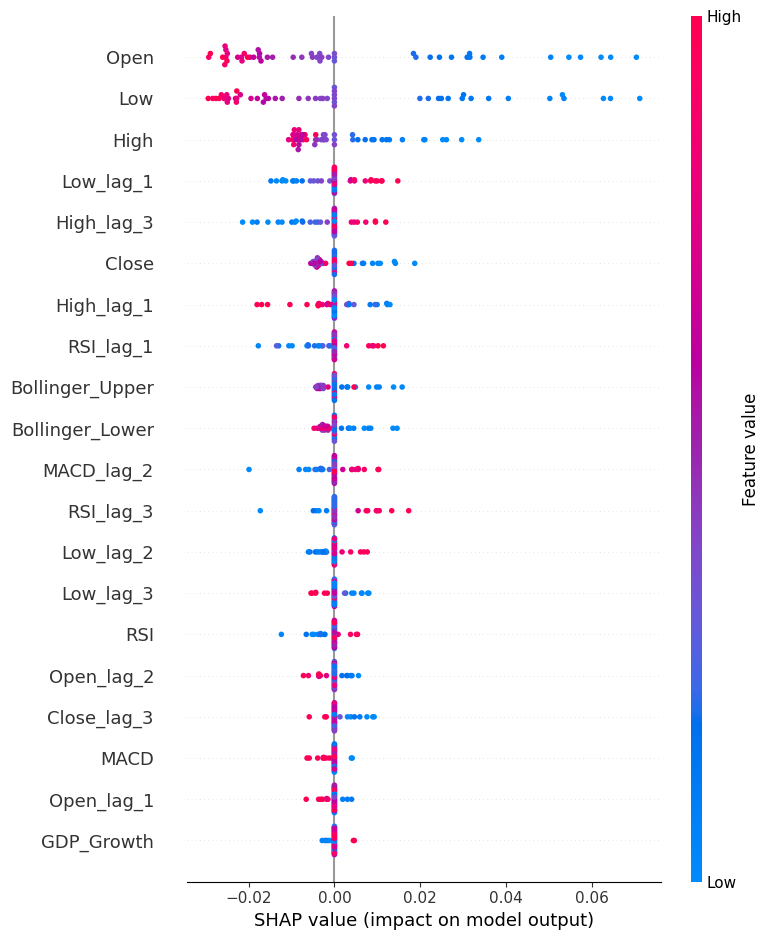

SHAP KernelExplainer created and summary plot generated using KernelExplainer.


In [31]:
import shap
import numpy as np

# Define a custom prediction function that reshapes the input for the LSTM
def predict_wrapper(X):
    # KernelExplainer passes a 2D array (samples, features)
    # Reshape it to 3D (samples, 1, features) for the LSTM model
    X_reshaped_for_lstm = X.reshape(X.shape[0], 1, X.shape[1])
    # The model predicts a 2D array (samples, 1), so flatten to 1D (samples,)
    return best_model.predict(X_reshaped_for_lstm).flatten()

# Select a subset of the training data as the background dataset for SHAP
# KernelExplainer expects 2D background data
background_data_2d = X_train.sample(n=50, random_state=42) # Use X_train (2D DataFrame)
background_data_values = background_data_2d.values

# Create a SHAP KernelExplainer
# Pass the wrapper function and 2D background data
explainer = shap.KernelExplainer(predict_wrapper, background_data_values)

# Select a subset of the test data to explain (also 2D for KernelExplainer)
X_test_subset_2d = X_test.sample(n=50, random_state=42) # Use X_test (2D DataFrame)
X_test_subset_values = X_test_subset_2d.values

# Calculate SHAP values for the test data subset
# This will call predict_wrapper internally for each perturbation
shap_values = explainer.shap_values(X_test_subset_values)

# The summary_plot expects shap_values as (samples, features)
# Create a summary plot to visualize overall feature importance
shap.summary_plot(shap_values, X_test_subset_2d, feature_names=X_test.columns)

print("SHAP KernelExplainer created and summary plot generated using KernelExplainer.")